<a href="https://colab.research.google.com/github/SrajanJain1/Speech-Emotion-Recognition/blob/main/Copy_of_ML_assignment_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Question 1 : Linear Regression
To check whether you are able to build simple linear regression model from scratch or not.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
 
!wget --no-check-certificate https://github.com/adigup390/datasets/raw/main/X.npy -O X.npy
!wget --no-check-certificate https://github.com/adigup390/datasets/raw/main/y.npy -O y.npy

--2021-05-26 15:41:05--  https://github.com/adigup390/datasets/raw/main/X.npy
Resolving github.com (github.com)... 52.69.186.44
Connecting to github.com (github.com)|52.69.186.44|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/adigup390/datasets/main/X.npy [following]
--2021-05-26 15:41:05--  https://raw.githubusercontent.com/adigup390/datasets/main/X.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 528 [application/octet-stream]
Saving to: ‘X.npy’

X.npy               100%[===================>]     528  --.-KB/s    in 0s      

2021-05-26 15:41:06 (21.6 MB/s) - ‘X.npy’ saved [528/528]

--2021-05-26 15:41:06--  https://github.com/adigup390/datasets/raw/main/y.npy
Resolving github.com (github

In [ ]:
def load_data_LR():
  # Implement this function to read the dataset using the path declared in path_X and path_y
  # should return the X and y data
  # use np.load() to load the data google it you will get to know how to do it

  path_X = "X.npy"
  path_y = "y.npy"

  # Write your code here ----------
  X = np.load(path_X)
  y = np.load(path_y)
  # -------------------------------

  return X, y

In [ ]:
def get_linear_model(X, y):
  # This shoudl return a proper linear model without bias of type y = XW

  # Write your code here ----------
  out_shape = y.shape[1]
  D = X.shape[1]
  # -------------------------------
  
  W = np.random.randn(D, out_shape)

  return W

In [ ]:
def MSE(y, y_pred):
  # should return the mean square error between the actual y and predicted y

  # Write your code here ----------
  error = np.sum((y - y_pred)**2)
  # -------------------------------

  return error

In [ ]:
def train_by_algebra(X, y):
  # should return the trained weight 'W' using the linear algebra method i.e. setting dE/dW = 0

  # Write your code here ----------
  var = np.linalg.inv(np.matmul(X.T,X))
  W=np.matmul(np.matmul(var,X.T),y)
  # -------------------------------

  return W

In [ ]:
def train_by_GD(X, y, epochs=5, lr=0.01):
  # should return the trained weight 'W' using the gradient descent for number of iterations equals to epochs
  # should also return error history int the cariable error_hist.shape = (epochs,); error_hist[i] = mean square error after epoch i-1
  # should also print mean square error after each epoch/ iteration
  # lr = "learning rate" i.e. eta
  
  # Write your code here ----------
    error_history = np.zeros(epochs,)
    W = get_linear_model(X,y)
  #print(X.shape,W.shape)
    for i in range(epochs):
      W = W - lr * np.matmul((np.matmul(X,W) - y).T,X)
      y_predicted = np.matmul(X,W)
      error_history[i] = MSE(y,y_predicted) / len(y)
      print(error_history[i])
  # -------------------------------
    return W, error_history

### Now write a complete code using the function defined above to learn the model for following cases:

##### Learn **W** using linear algebra method and prints mean square error between actual y and predicted y. Use `y_pred = XW`. Also plot y_pred and y on different plots.

5.490059820643823


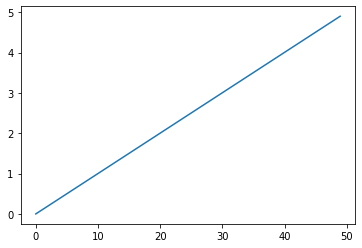

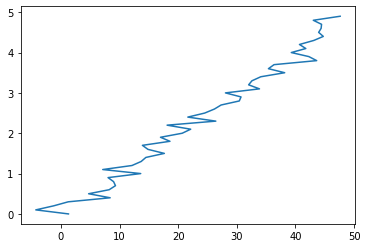

In [ ]:
import matplotlib.pyplot as plt
# Write your code here ----------
X,y = load_data_LR()
W = train_by_algebra(X, y)
y_predicted = np.matmul(X, W)
print(MSE(y, y_predicted)/X.shape[0])
plt.plot(y_predicted, X)
plt.show()
plt.plot(y, X)
plt.show()

##### Learn **W** using gradient descent method for following learning rates, `lr = [0.01, 0.001, 0.0001]` for **10 epochs**. Plot **MSE vs epochs** for each of them.  Also plot y_pred and y on different plots.

7962.305910655945
73660.19275793196
681812.8023375897
6311363.679648382
58423025.42543192
540810581.5716871
5006178726.228571
46341226476.239334
428971754832.58765
3970908421162.4355


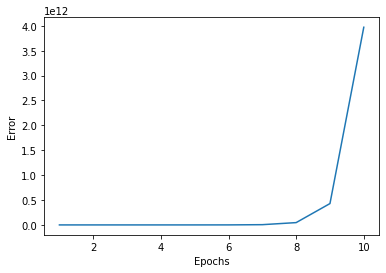

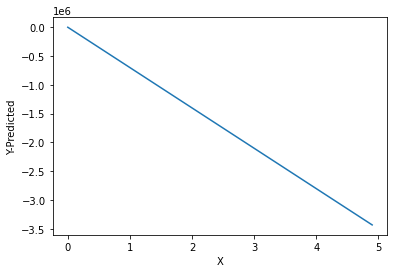

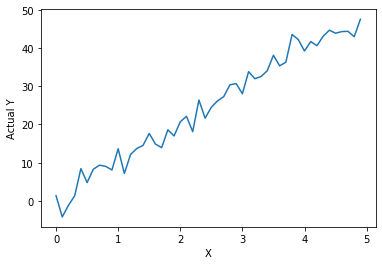

302.5498217931067
110.92193498662151
42.90973668029448
18.77097903104713
10.203697935019186
7.1630151275240745
6.083821876810853
5.700796699204641
5.564854145279921
5.516605677429663


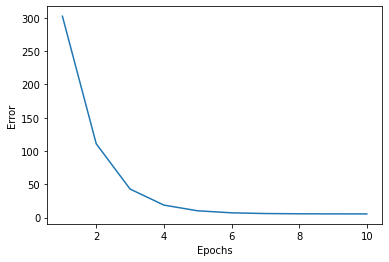

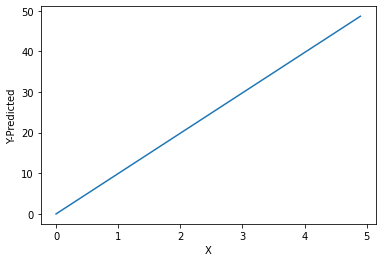

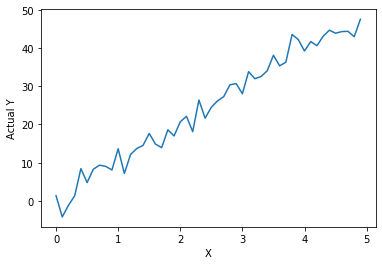

624.0592418443658
575.0587772502331
529.9399246086805
488.395198848388
450.141472579907
414.91804658193064
382.48487313557865
352.620920098711
325.1226645714353
299.80270588713574


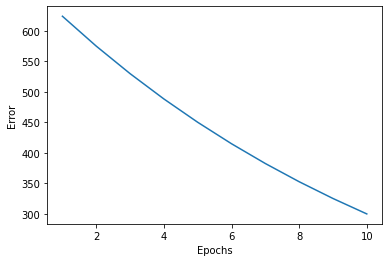

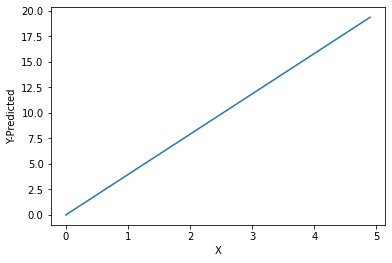

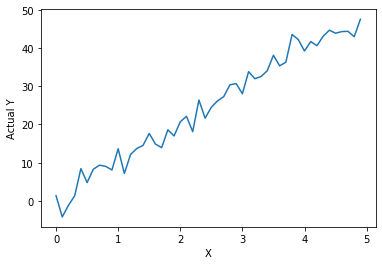

In [ ]:
# Write your code here ----------
lr = [0.01, 0.001, 0.0001]
#plt.subplots(3,3)
epoch=[i+1 for i in range(10)]
for i in lr:
  X,y = load_data_LR()
  #print(X.shape,y.shape)
  W,error = train_by_GD(X, y, 10, i)
  plt.plot(epoch, error)
  plt.xlabel('Epochs')
  plt.ylabel('Error')
  plt.show()
  y_predicted = np.matmul(X, W)
  plt.plot(X, y_predicted)
  plt.ylabel('Y-Predicted')
  plt.xlabel('X')
  plt.show()
  plt.plot(X, y)
  plt.ylabel('Actual Y')
  plt.xlabel('X')
  plt.show()
# -------------------------------

## Question 2: Image Classification in Tensorflow using Deep Learning
To check whether you are able to build a given neural network model in tensorflow or not. First we will build a fully connected NN model second we will build a CNN model.

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
def plot_history(history):
  # function to plot accuracy vs epoch

  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(loc='lower right')

In [ ]:
def load_data_cifar10_norm():
  # should return the normalised cifar10 dataset by loading it from tensorflow
  # link: https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar10/

  # Write your code here ----------
  (x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
  x_train=x_train/255.0
  x_test=x_test/255.0
  # -------------------------------

  return x_train, y_train, x_test, y_test

### Define a fully connected neural network model with following attributes:

*   Total number of **hidden layers = 4**, all with **relu** activation
*   Number of neurons in **first hidden layer = 7200**
*   Number of neurons in **second hidden layer = 2304**
*   Number of neurons in **third hidden layer = 1024**
*   Number of neurons in **fourth hidden layer = 64**


In [ ]:
def build_fc_model(input_shape=(32, 32, 3), num_class=10):
  # should return a sequential model defined based on the above attributes
  # do not compile the model

  # Write your code here ----------
  model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    #  hidden layer
    tf.keras.layers.Dense(7200, activation='relu'),
    tf.keras.layers.Dense(2304, activation='relu'),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(num_class,activation='softmax')
])
  # -------------------------------

  return model

### Define a CNN model with following attribute:

*   Total number of **hidden layer = 4**
*   After every convolutional layer there must be a MaxPoolingLayer of size (2, 2)
*   Total number of convolutional layer = 3, all with **relu** activation.
    *    Number of filters in **first convolutional layer = 32**
    *    Number of filters in **second convolutional layer = 64**
    *    Number of filters in **third convolutional layer = 64**
*   After all convolutional layer flatten the output and use **dense layer of 64 neurons**



In [ ]:
def build_cnn_model(input_shape=(32, 32, 3), num_class=10):
  # should return a sequential model defined based on the above attributes
  # do not compile the model

  # Write your code here ----------
  model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 64 neuron hidden layer
    tf.keras.layers.Dense(64, activation='relu'), 
    tf.keras.layers.Dense(num_class,activation='softmax')
])
  # -------------------------------
  return model

### Compile and train the fully connected neural network model using the above functions.

Epoch 1/10
98/98 [==============================] - 206s 2s/step - loss: 2.0771 - accuracy: 0.2624 - val_loss: 1.9851 - val_accuracy: 0.2918
Epoch 2/10
98/98 [==============================] - 213s 2s/step - loss: 1.9094 - accuracy: 0.3264 - val_loss: 1.8436 - val_accuracy: 0.3469
Epoch 3/10
98/98 [==============================] - 207s 2s/step - loss: 1.8339 - accuracy: 0.3567 - val_loss: 1.7889 - val_accuracy: 0.3685
Epoch 4/10
98/98 [==============================] - 208s 2s/step - loss: 1.7877 - accuracy: 0.3731 - val_loss: 1.7703 - val_accuracy: 0.3790
Epoch 5/10
98/98 [==============================] - 220s 2s/step - loss: 1.7551 - accuracy: 0.3835 - val_loss: 1.7164 - val_accuracy: 0.3997
Epoch 6/10
98/98 [==============================] - 209s 2s/step - loss: 1.7159 - accuracy: 0.3984 - val_loss: 1.7395 - val_accuracy: 0.3854
Epoch 7/10
98/98 [==============================] - 208s 2s/step - loss: 1.6931 - accuracy: 0.4061 - val_loss: 1.6784 - val_accuracy: 0.4076
Epoch 8/10
98

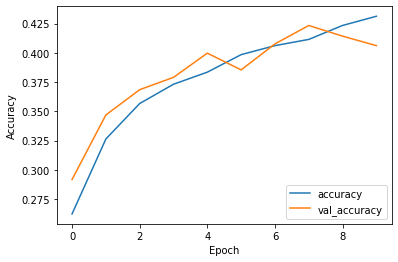

In [ ]:
# Write your code here ----------
x_train, y_train, x_test, y_test=load_data_cifar10_norm()
model=build_fc_model()
model.compile(loss='sparse_categorical_crossentropy',optimizer = 'sgd', metrics = ['accuracy'])
x_train, y_train, x_test, y_test=load_data_cifar10_norm()
# -------------------------------

history = model.fit(x_train, y_train, epochs= 10, batch_size=512,
                    validation_data=(x_test, y_test))

plot_history(history)
model.summary()

### Compile and train the CNN model using the above functions.

Epoch 1/10
98/98 [==============================] - 61s 605ms/step - loss: 2.0379 - accuracy: 0.2580 - val_loss: 2.0277 - val_accuracy: 0.2750
Epoch 2/10
98/98 [==============================] - 57s 585ms/step - loss: 1.7600 - accuracy: 0.3744 - val_loss: 1.7394 - val_accuracy: 0.3751
Epoch 3/10
98/98 [==============================] - 57s 584ms/step - loss: 1.6344 - accuracy: 0.4186 - val_loss: 1.5730 - val_accuracy: 0.4468
Epoch 4/10
98/98 [==============================] - 57s 583ms/step - loss: 1.5288 - accuracy: 0.4575 - val_loss: 1.5479 - val_accuracy: 0.4600
Epoch 5/10
98/98 [==============================] - 57s 583ms/step - loss: 1.4487 - accuracy: 0.4876 - val_loss: 1.4813 - val_accuracy: 0.4674
Epoch 6/10
98/98 [==============================] - 57s 586ms/step - loss: 1.3793 - accuracy: 0.5142 - val_loss: 1.4421 - val_accuracy: 0.4907
Epoch 7/10
98/98 [==============================] - 57s 583ms/step - loss: 1.3240 - accuracy: 0.5335 - val_loss: 1.2387 - val_accuracy: 0.5612

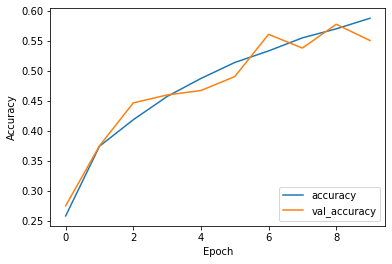

In [ ]:
# Write your code here ----------
model=build_cnn_model()
model.compile(loss='sparse_categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
x_train, y_train, x_test, y_test=load_data_cifar10_norm()
# -------------------------------

history = model.fit(x_train, y_train, epochs=10, batch_size=512,
                    validation_data=(x_test, y_test))

plot_history(history)
model.summary()

### What do you observe? Compare both the model by looking at their Accuracy vs Epoch plot and total numbers of trainable parameters.

In [ ]:
print("In both the models as the accuracy and the validation accuracy both are similar and low the model might be underfitting and more number of parameters are required.")

In both the models as the accuracy and the validation accuracy both are similar and low the model might be underfitting and more number of parameters are required.
